In [18]:
import sys, os, importlib.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from scipy.constants import lambda2nu, nu2lambda, c
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [19]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [20]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

fdtdApi = lumapi.FDTD(hide = False)

In [21]:
um = 1e-6
nm = 1e-9
valor_lambda_1550 = 1550
mesh_accuracy = 3

In [ ]:
yspan_waveguide = 0.45*um
zspan_waveguide = 0.22*um
xspan_waveguide = 5*um
radiu = 5*um

xwaveguide = -xspan_waveguide/2
ywaveguide = 0*um
zwaveguide = 0*um

In [26]:
sub_material = 'SiO2 (Glass) - Palik'
waveguide_material = 'Si (Silicon) - Palik'

In [36]:
fdtdApi.switchtolayout()

fdtdApi.selectall()
fdtdApi.delete()

fdtdApi.addobject("90_bend_wg")
fdtdApi.set("name", "upper_r")
fdtdApi.set("base height", zspan_waveguide)
fdtdApi.set("base width", yspan_waveguide)
fdtdApi.set('radius', radiu)
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 90)
fdtdApi.set('x', 2*radiu)
fdtdApi.set('y', radiu)
fdtdApi.set('z', zwaveguide)
fdtdApi.set('material', "Si (Silicon) - Palik")

fdtdApi.copy()
fdtdApi.set("name", "upper_l")
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', -90)
fdtdApi.set('x', 0)
fdtdApi.set('y', radiu)
fdtdApi.set('material', "Si (Silicon) - Palik")

fdtdApi.copy()
fdtdApi.set("name", "lower_r")
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 180)
fdtdApi.set('x', 2*radiu)
fdtdApi.set('y', -radiu)

fdtdApi.copy()
fdtdApi.set("name", "lower_l")
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 0)
fdtdApi.set('x', 0)
fdtdApi.set('y', -radiu)

fdtdApi.addrect()
fdtdApi.set("name", "waveguide_in")
fdtdApi.set("x span", xspan_waveguide)
fdtdApi.set("y span", yspan_waveguide)
fdtdApi.set("z span", zspan_waveguide)
fdtdApi.set('x', xwaveguide)
fdtdApi.set('y', ywaveguide)
fdtdApi.set('z', zwaveguide)
fdtdApi.set('material', "Si (Silicon) - Palik")

fdtdApi.copy()
fdtdApi.set("name", "waveguide_out1")
fdtdApi.set('x', xspan_waveguide+radiu+xspan_waveguide/2)
fdtdApi.set('y', 2*radiu)

fdtdApi.copy()
fdtdApi.set("name", "waveguide_out2")
fdtdApi.set('y', -2*radiu)


In [ ]:
fdtdApi.addobject("90_bend_wg")
fdtdApi.set("name", "upper_r")
fdtdApi.set("base height", zspan_waveguide)
fdtdApi.set("base width", yspan_waveguide)
fdtdApi.set('radius', radiu)
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 90)
fdtdApi.set('x', 2*radiu)
fdtdApi.set('y', radiu)
fdtdApi.set('z', zwaveguide)
fdtdApi.set('material', "Si (Silicon) - Palik")

In [145]:
xfdtd = radiu
yfdtd = 0
zfdtd = 0

xspan_fdtd = (2*xspan_waveguide + 2*radiu)
yspan_fdtd = 4*radiu + 2*um
zspan_fdtd = 2*um

number_points = 21

start_lambda = 1500*nm 
stop_lambda = 1600*nm

time_simulation = (np.pi*radiu+3*xspan_waveguide)*7/c + 200e-15

In [146]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD')
fdtdApi.delete()

fdtdApi.addfdtd()
fdtdApi.set('background material', sub_material)

fdtdApi.set('x', xfdtd)
fdtdApi.set('y', yfdtd)
fdtdApi.set('z', zfdtd)
fdtdApi.set("x span", xspan_fdtd)
fdtdApi.set("y span", yspan_fdtd)
fdtdApi.set("z span", zspan_fdtd)

fdtdApi.set('mesh accuracy', mesh_accuracy)
fdtdApi.set('simulation time', time_simulation)

fdtdApi.set('x min bc', 'PML')
fdtdApi.set('x max bc', 'PML')
fdtdApi.set('y min bc', 'Anti-Symmetric')
fdtdApi.set('y max bc', 'PML')
fdtdApi.set('z min bc', 'PML')
fdtdApi.set('z max bc', 'PML')

fdtdApi.set('global source wavelength start', start_lambda)
fdtdApi.set('global source wavelength stop', stop_lambda)

In [147]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD::ports')
fdtdApi.delete()

fdtdApi.addport()
fdtdApi.set('name', 'in')
fdtdApi.set('x', fdtdApi.getnamed('waveguide_in', 'x') - fdtdApi.getnamed('waveguide_in', 'x span')*0.25)
fdtdApi.set('y', fdtdApi.getnamed('waveguide_in', 'y'))
fdtdApi.set("y span", fdtdApi.getnamed('waveguide_in', 'y span')*2.5)
fdtdApi.set("z span", fdtdApi.getnamed('waveguide_in', 'z span')*2.5)
fdtdApi.set('direction', 'Forward')

fdtdApi.copy()
fdtdApi.set('name', 'out1')
fdtdApi.set('x', fdtdApi.getnamed('waveguide_out1', 'x') + fdtdApi.getnamed('waveguide_out1', 'x span')*0.25)
fdtdApi.set('y', fdtdApi.getnamed('waveguide_out1', 'y'))
fdtdApi.set('direction', 'Backward')

fdtdApi.copy()
fdtdApi.set('name', 'out2')
fdtdApi.set('x', fdtdApi.getnamed('waveguide_out2', 'x') + fdtdApi.getnamed('waveguide_out2', 'x span')*0.25)
fdtdApi.set('y', fdtdApi.getnamed('waveguide_out2', 'y'))
fdtdApi.set('direction', 'Backward')

In [148]:
fdtdApi.switchtolayout()

fdtdApi.select('Monitor_E')
fdtdApi.delete()

fdtdApi.addprofile()
fdtdApi.set('name', 'Monitor_E')
fdtdApi.set('x', xfdtd)
fdtdApi.set('y', yfdtd)
fdtdApi.set("x span", (2*xspan_waveguide + 2*radiu)+1*um)
fdtdApi.set("y span", 2*radiu*2 + 2*um)

In [149]:
fdtdApi.save('Y_Branch')

In [150]:
fdtdApi.run(3)

In [151]:
E = fdtdApi.getresult('Monitor_E', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)
Emag_log = 10*np.log10((Emag[:,:,0]))

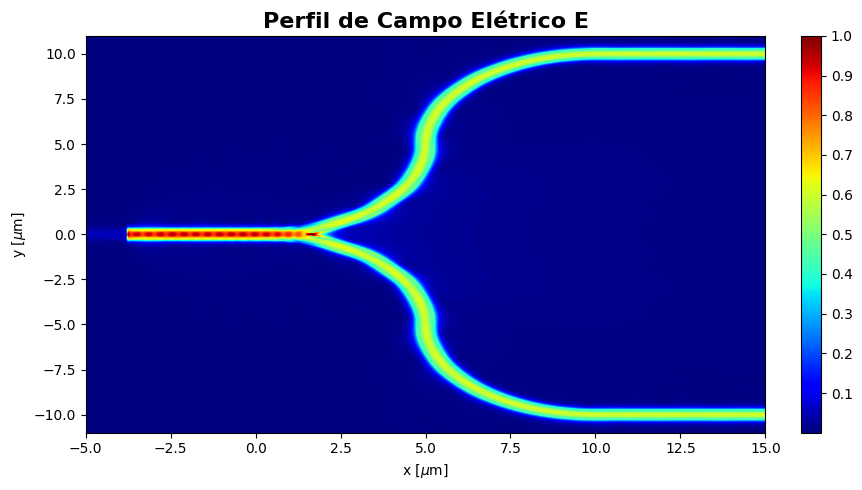

In [152]:
plt.figure(figsize=(10, 5))
mycmap = plt.get_cmap('jet')

v = np.linspace(Emag.min(),1.00001,250,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=np.linspace(0,1,11, endpoint=True), fraction=0.2, pad=0.04)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Linear.png')
plt.show()

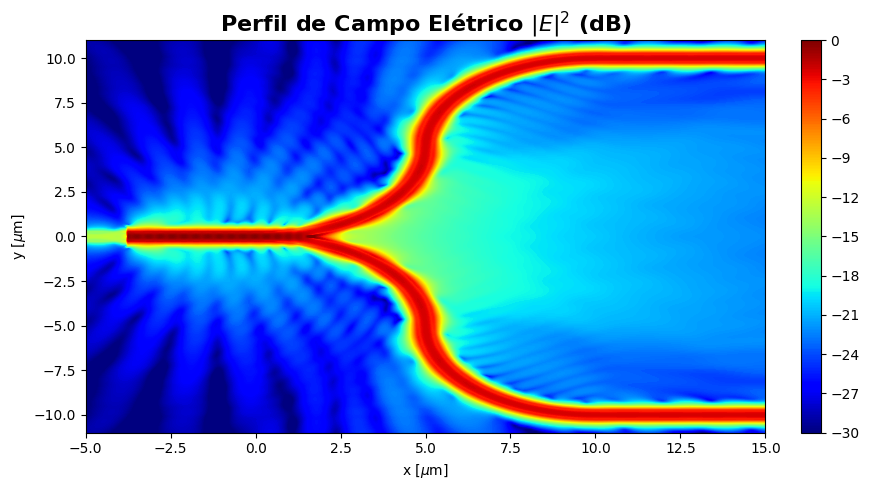

In [153]:
plt.figure(figsize=(10, 5))
mycmap = plt.get_cmap('jet')

v = np.linspace(-30,0.00001,250,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag_log), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=np.linspace(-30,0,11, endpoint=True), fraction=0.2, pad=0.04)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Log.png')
plt.show()

In [154]:
trans_in = fdtdApi.getresult('FDTD::ports::in', 'T')
trans_out1 = fdtdApi.getresult('FDTD::ports::out1', 'T')
trans_out2 = fdtdApi.getresult('FDTD::ports::out2', 'T')

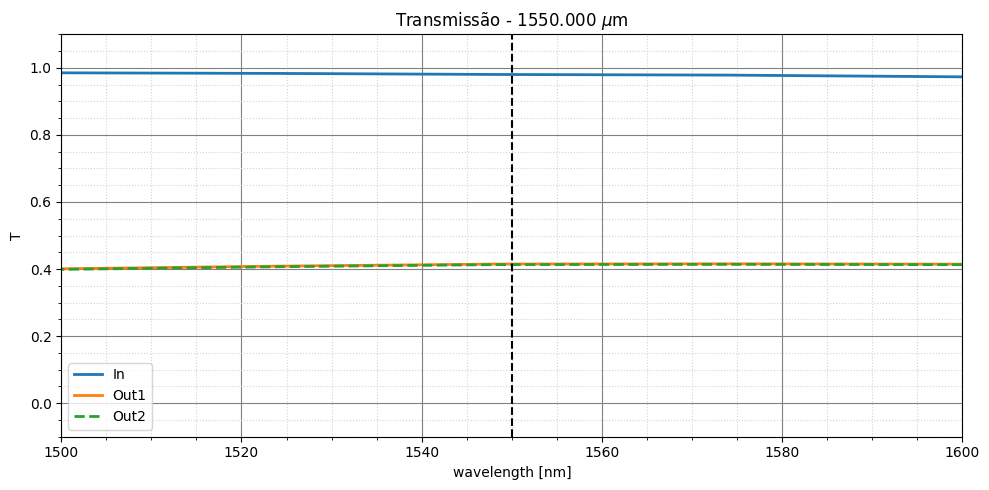

In [155]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)
plt.plot(trans_in['lambda']/nm, np.abs(trans_in['T']), label = 'In', linewidth=2)
plt.plot(trans_out1['lambda']/nm, np.abs(trans_out1['T']), label = 'Out1', linewidth=2)
plt.plot(trans_out2['lambda']/nm, np.abs(trans_out2['T']), label = 'Out2', linewidth=2, linestyle='--')

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_lambda/nm, stop_lambda/nm])
plt.ylim([-0.1,1.1])
plt.title(r'Transmissão - %4.3f $\mu$m'%valor_lambda_1550)
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - Linear.png')
plt.show()

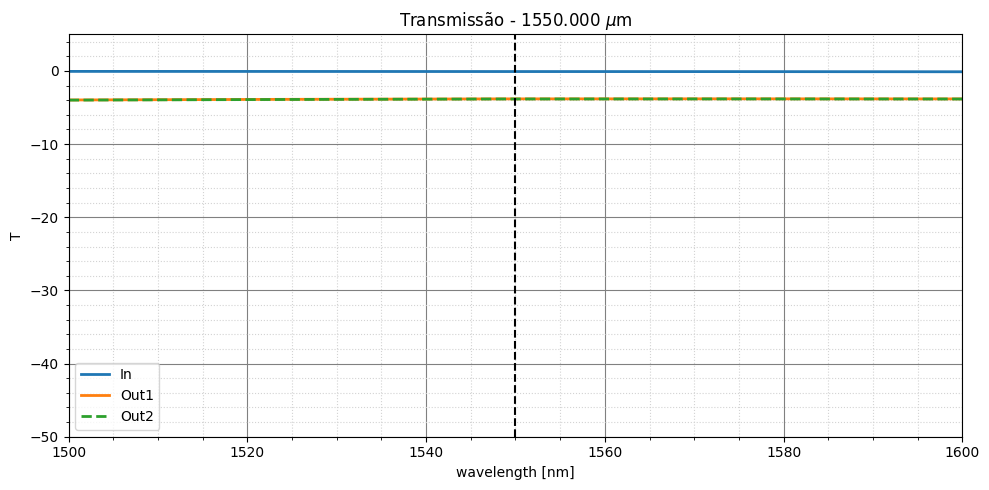

In [156]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)
plt.plot(trans_in['lambda']/nm, 10*np.log10(np.abs(trans_in['T'])), label = 'In', linewidth=2)
plt.plot(trans_out1['lambda']/nm, 10*np.log10(np.abs(trans_out1['T'])), label = 'Out1', linewidth=2)
plt.plot(trans_out2['lambda']/nm, 10*np.log10(np.abs(trans_out2['T'])), label = 'Out2', linewidth=2, linestyle='--')

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_lambda/nm, stop_lambda/nm])
plt.ylim([-50,5])
plt.title(r'Transmissão - %4.3f $\mu$m'%valor_lambda_1550)
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - Log.png')
plt.show()

In [157]:
x_value = 1550


transmition_in = interp1d(np.ravel(trans_in['lambda'])/nm, np.abs(trans_in['T']), kind='linear', fill_value='extrapolate')
transmition_out1 = interp1d(np.ravel(trans_out1['lambda'])/nm, np.abs(trans_out1['T']), kind='linear', fill_value='extrapolate')
transmition_out2 = interp1d(np.ravel(trans_out2['lambda'])/nm, np.abs(trans_out2['T']), kind='linear', fill_value='extrapolate')

T_in = transmition_in(x_value)
T_out1 = transmition_out1(x_value)
T_out2 = transmition_out2(x_value)

print(f'Transmissão na Port 00 para {x_value}nm: {T_in:.4f}')
print(f'Transmissão na Port 01 para {x_value}nm: {T_out1:.4f}')
print(f'Transmissão na Port 10 para {x_value}nm: {T_out2:.4f}')

Transmissão na Port 00 para 1550nm: 0.9802
Transmissão na Port 01 para 1550nm: 0.4149
Transmissão na Port 10 para 1550nm: 0.4133
